# 15wk-2: 기말고사

최규빈  
2023-06-20

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

# `1`. 다음을 읽고 참 거짓을 판단하여라. (30점)

`(1)` 전이확률행렬 ${\bf P}={\bf I}$를 가지는 HMC는 irreducible 하다.

`(2)` HMC $\{X_t\}$가 유한한 상태공간을 가진다면 irreducible 조건은
positive recurrent 를 암시한다.

`(3)` HMC $\{X_t\}$가 irreducible 하다면 항상 전이확률행렬 ${\bf P}$가
수렴한다.

`(4)` HMC $\{X_t\}$가 irreducible 하다면 positive recurrent 조건과
유일한 정상분포를 가질 조건이 동치이다.

`(5)` HMC $\{X_t\}$가 정상분포를 가진다면 DBC (detailed balance
condition) 을 만족한다.

# `2`. 페이지랭크 알고리즘 (20점)

아래는 7개의 website에 대한 web graph이다.

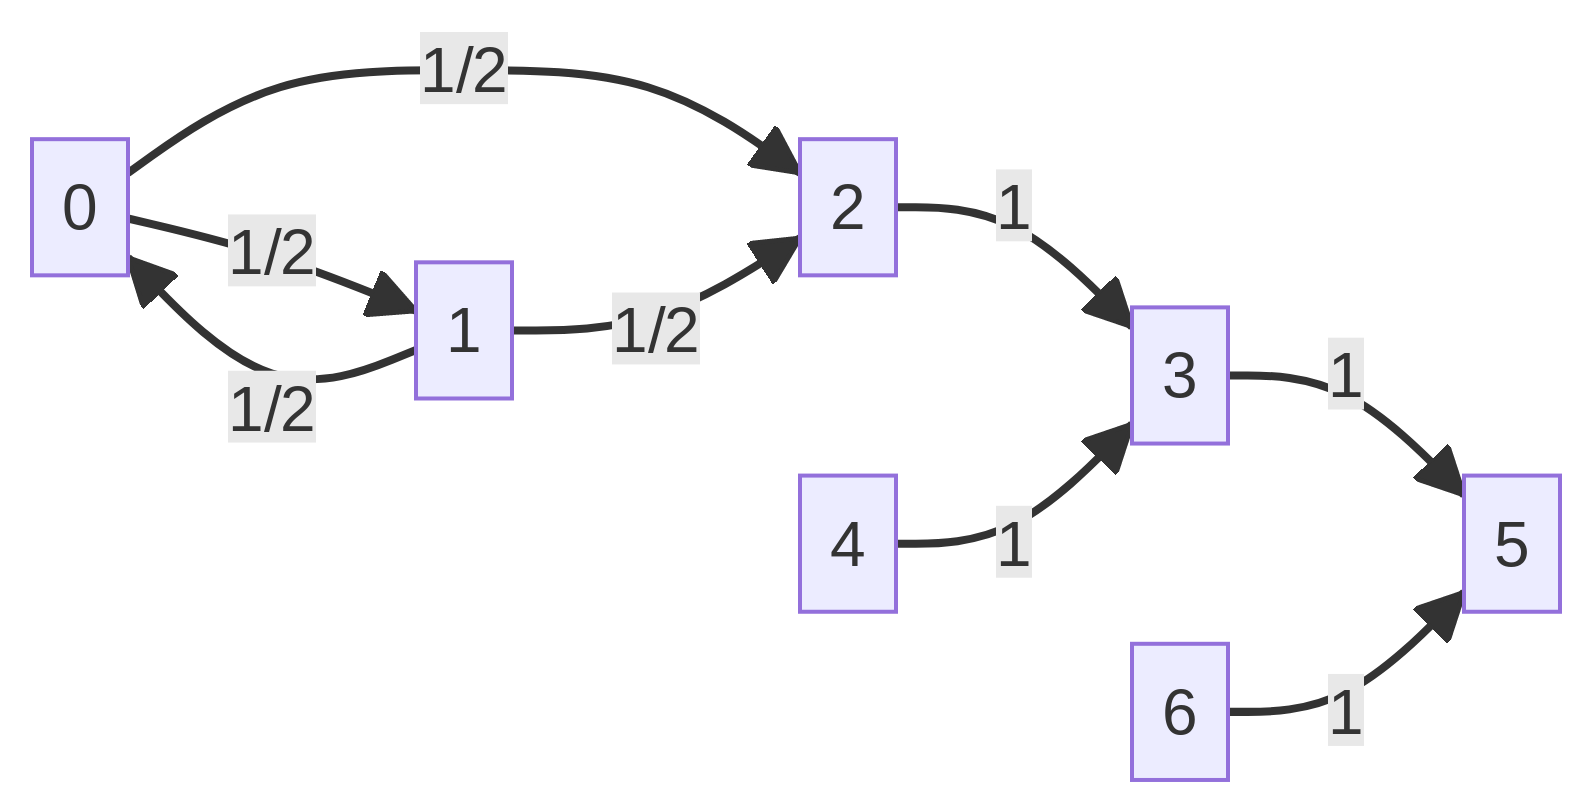

구글의 페이지랭크 알고리즘을 이용하여 위의 website들의 중요도를
랭킹하라. 단, 이때 구글매트릭스를 만들기 위한 $\alpha$는 0.85로
설정하라.

**hint:** 아래의 매트릭스를 적절하게 수정하여 만들어라.

In [2]:
P = np.array([0.0, 1/2, 1/2, 0.0, 0.0, 0.0, 0.0,
              1/2, 0.0, 1/2, 0.0, 0.0, 0.0, 0.0,
              0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,
              0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
              0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,
              0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ### 이 부분은 다 0이므로 수정이 필요함!!
              0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]).reshape(7,7)
P

# `3`. MH-알고리즘 (20점)

매트로폴리스 헤이스팅스 알고리즘을 사용하여 $X_t \sim {\cal B}(2,6)$인
따르는 확률변수열 $\{X_t\}$를 샘플링하라. 샘플링결과를 히스토그램으로
시각화하고, 시각화 결과를

``` python
np.random.beta(2,6,size=100000)
```

으로 생성한 결과와 비교하라.

# `4`. LDA (30점)

아래는 장하니 학생의 2023년 확률과정론 필기자료를 바탕으로 작성한
코퍼스이다.

In [3]:
D = {'doc1': ['기대값', '기대값', '르벡메져', '잴 수 있는 집합', 'outcome', '확률과정', '잴 수 있는 집합', '잴 수 있는 집합', '잴 수 있는 집합', '시그마필드', '평균', '기대값', '기대값', '전사', '확률변수', 'event', '전단사', '시그마필드', '전단사', '르벡메져', '시그마필드', '시그마필드', '확률', '확률', '메져', '메져', '확률', '확률과정', '르벡메져', '기대값'], 'doc2': ['기대값', '확률변수', '르벡메져', '전단사', '기대값', '확률', '확률', '단사', '확률변수', '르벡메져', '확률변수', '확률', '잴 수 있는 집합', '기대값', '시그마필드', '르벡메져', '시그마필드', 'countable', 'countable', '가산집합', '확률과정', '확률', '기대값', '기대값', '카디널리티', '기대값', '잴 수 있는 함수', '확률과정', '잴 수 있는 집합', '잴 수 있는 함수'], 'doc3': ['전단사', 'event', '전사', '시그마필드', '평균', '카디널리티', 'countable', '전단사', 'event', '평균', '메져', '확률변수', '확률변수', '기대값', '기대값', 'event', '기대값', '확률과정', '카디널리티', '확률', '단사', 'outcome', 'countable', '가산집합', '가산집합', '확률변수', '기대값', '확률변수', '잴 수 있는 집합', '전사'], 'doc4': ['잴 수 있는 함수', '가산집합', '평균', '가산집합', '확률', '확률변수', '메져', 'outcome', 'countable', '잴 수 있는 함수', '기대값', 'countable', '전사', '르벡메져', 'outcome', '잴 수 있는 집합', '카디널리티', 'outcome', '시그마필드', '가산집합', '르벡메져', '잴 수 있는 함수', '카디널리티', '메져', '시그마필드', '확률과정', 'event', '가산집합', '단사', '가산집합'], 'doc5': ['확률', 'countable', '기대값', '카디널리티', '전사', 'outcome', '시그마필드', '메져', '잴 수 있는 함수', '확률변수', '전사', '단사', '기대값', '가산집합', 'event', '평균', 'event', 'outcome', '잴 수 있는 집합', 'outcome', '카디널리티', '확률', '메져', '평균', '평균', '잴 수 있는 집합', '기대값', '확률과정', '확률', '시그마필드'], 'doc6': ['단사', '평균', '기대값', '확률', 'event', '확률', '잴 수 있는 함수', 'outcome', '메져', '확률변수', '시그마필드', '잴 수 있는 집합', '카디널리티', '전사', '기대값', '시그마필드', '잴 수 있는 함수', '전사', '확률과정', '카디널리티', '전단사', '메져', '단사', '전단사', '시그마필드', 'countable', '카디널리티', '확률과정', '확률변수', '메져'], 'doc7': ['확률변수', '메져', '메져', '잴 수 있는 함수', '르벡메져', '단사', '확률변수', '평균', '카디널리티', '평균', '전사', '확률변수', '평균', '확률변수', '잴 수 있는 집합', '가산집합', '메져', '확률과정', '확률변수', '르벡메져', 'event', '카디널리티', 'countable', '기대값', '르벡메져', '잴 수 있는 집합', '시그마필드', '메져', '메져', '메져'], 'doc8': ['기대값', 'countable', '확률', '전단사', '확률', '단사', '확률변수', 'event', '확률변수', '잴 수 있는 집합', '가산집합', 'countable', '전단사', 'event', 'outcome', '전사', '확률변수', '확률', '카디널리티', '시그마필드', '가산집합', '기대값', '전단사', 'outcome', '전사', 'event', 'event', 'outcome', '평균', '가산집합'], 'doc9': ['단사', '기대값', '기대값', 'outcome', '잴 수 있는 집합', '전단사', '메져', '시그마필드', '가산집합', '전사', '단사', '르벡메져', '기대값', '기대값', '가산집합', '확률변수', '시그마필드', 'event', 'outcome', '르벡메져', '단사', '잴 수 있는 함수', '전사', 'event', '기대값', '단사', '전단사', '전단사', '평균', '시그마필드'], 'doc10': ['기대값', '시그마필드', '시그마필드', '단사', '확률변수', 'event', 'event', '확률과정', '시그마필드', '르벡메져', '카디널리티', '확률변수', '카디널리티', '전사', 'countable', '단사', '단사', '르벡메져', 'countable', '평균', '전단사', '시그마필드', '가산집합', '기대값', '전사', '잴 수 있는 집합', '시그마필드', 'outcome', '가산집합', '확률변수'], 'doc11': ['확률변수', '마코프체인', '확률과정', 'irreducible', '상태공간', 'ergodic', '극한분포', 'ergodic', 'recurrent', '확률변수', '극한분포', '전이확률', '전이확률', 'homogeneous', 'transient', '상태공간', 'theorem', 'detailed balance condition', 'theorem', '마코프체인', '마코프체인', '정상분포', '분포', 'detailed balance condition', '확률변수', 'detailed balance condition', '정상분포', 'homogeneous', '전이확률', 'theorem'], 'doc12': ['aperiodic', '정상분포', '확률과정', '극한분포', 'homogeneous', '분포', '확률과정', '마코프체인', 'homogeneous', '확률변수', '확률과정', 'irreducible', '정상분포', 'detailed balance condition', '상태공간', 'ergodic', 'transient', '확률변수', '전이확률', 'ergodic', '상태공간', 'theorem', 'detailed balance condition', '확률변수', '상태공간', '전이확률', '전이확률', '마코프체인', '극한분포', '극한분포'], 'doc13': ['irreducible', '마코프체인', '마코프체인', '상태공간', '마코프체인', '상태공간', 'irreducible', 'recurrent', 'irreducible', '마코프체인', '정상분포', 'detailed balance condition', 'irreducible', 'detailed balance condition', '정상분포', 'ergodic', 'theorem', 'aperiodic', '전이확률', '확률과정', '확률변수', '분포', 'aperiodic', 'transient', '전이확률', 'homogeneous', 'ergodic', 'theorem', '분포', '상태공간'], 'doc14': ['확률과정', '확률변수', 'theorem', 'recurrent', 'detailed balance condition', 'homogeneous', 'irreducible', 'ergodic', '마코프체인', '분포', '상태공간', 'transient', 'ergodic', '상태공간', 'homogeneous', '정상분포', '상태공간', 'theorem', '확률변수', 'transient', '분포', '마코프체인', 'detailed balance condition', '확률과정', 'aperiodic', 'ergodic', 'ergodic', 'irreducible', '분포', 'ergodic'], 'doc15': ['detailed balance condition', '전이확률', '분포', '분포', '확률과정', '확률변수', 'homogeneous', 'irreducible', 'homogeneous', '확률과정', 'theorem', '마코프체인', '정상분포', '상태공간', '확률과정', '마코프체인', 'recurrent', '확률변수', 'transient', '마코프체인', 'homogeneous', 'irreducible', 'transient', 'detailed balance condition', '마코프체인', '극한분포', 'detailed balance condition', 'ergodic', 'theorem', '전이확률'], 'doc16': ['마코프체인', '정상분포', 'detailed balance condition', '확률과정', 'homogeneous', 'aperiodic', '극한분포', 'aperiodic', 'homogeneous', 'transient', '마코프체인', '전이확률', '극한분포', 'irreducible', 'irreducible', 'recurrent', 'transient', '확률변수', '정상분포', '극한분포', '확률변수', 'recurrent', '극한분포', 'recurrent', '상태공간', '분포', 'ergodic', '마코프체인', 'theorem', 'homogeneous'], 'doc17': ['극한분포', '전이확률', '정상분포', 'irreducible', '상태공간', 'ergodic', 'ergodic', '상태공간', '극한분포', 'transient', '상태공간', 'ergodic', 'irreducible', 'transient', '확률과정', 'ergodic', 'irreducible', '마코프체인', 'aperiodic', '전이확률', '확률변수', 'aperiodic', 'detailed balance condition', '전이확률', '전이확률', 'detailed balance condition', 'ergodic', '마코프체인', 'transient', '극한분포'], 'doc18': ['정상분포', '상태공간', 'transient', '확률변수', 'detailed balance condition', 'aperiodic', 'homogeneous', '극한분포', '정상분포', 'ergodic', 'aperiodic', 'transient', 'recurrent', '확률과정', '확률변수', 'homogeneous', '상태공간', 'aperiodic', '확률변수', 'irreducible', '확률과정', 'theorem', '정상분포', 'irreducible', '전이확률', 'aperiodic', '전이확률', '확률과정', '정상분포', 'ergodic'], 'doc19': ['극한분포', 'recurrent', 'aperiodic', 'irreducible', '확률변수', 'aperiodic', 'ergodic', 'transient', '극한분포', 'homogeneous', 'theorem', 'ergodic', 'homogeneous', 'transient', '극한분포', 'transient', 'irreducible', 'homogeneous', '분포', '정상분포', '정상분포', 'aperiodic', 'ergodic', '확률과정', '확률과정', '정상분포', 'irreducible', '마코프체인', '극한분포', 'homogeneous'], 'doc20': ['확률과정', 'detailed balance condition', '확률변수', 'aperiodic', 'irreducible', '확률과정', 'recurrent', 'theorem', 'transient', '전이확률', 'recurrent', 'recurrent', 'aperiodic', '전이확률', '확률변수', 'ergodic', '확률과정', '상태공간', '마코프체인', '확률변수', 'recurrent', '분포', '마코프체인', '마코프체인', 'ergodic', 'aperiodic', '마코프체인', 'ergodic', '확률변수', 'homogeneous'], 'doc21': ['페이지랭크', 'MDP', '메트로폴리스-헤이스팅스', '페이지랭크', '메트로폴리스-헤이스팅스', '샘플링', '구글매트릭스', '마코프체인', '몬테카를로', '강화학습', 'MCMC', '계층모형', '구글매트릭스', '메트로폴리스-헤이스팅스', '샘플링', '구글', '구글매트릭스', '베이지안', '계층모형', '몬테카를로', '몬테카를로', '몬테카를로', '계층모형', '계층모형', 'MCMC', '강화학습', '베이지안', '계층모형', 'MDP', '메트로폴리스-헤이스팅스'], 'doc22': ['강화학습', '강화학습', '구글매트릭스', 'MCMC', '계층모형', 'LDA', '강화학습', 'MCMC', '메트로폴리스-헤이스팅스', 'LDA', '구글매트릭스', '계층모형', '구글', '구글', '샘플링', '구글', '구글', '메트로폴리스-헤이스팅스', 'LDA', '베이지안', '강화학습', '마코프체인', '베이지안', '메트로폴리스-헤이스팅스', '강화학습', '마코프체인', '몬테카를로', '메트로폴리스-헤이스팅스', 'MCMC', '구글'], 'doc23': ['강화학습', '마코프체인', '계층모형', 'LDA', 'MDP', '구글매트릭스', '계층모형', '베이지안', '마코프체인', '계층모형', 'MCMC', '구글매트릭스', '몬테카를로', 'MCMC', 'LDA', '마코프체인', '베이지안', '강화학습', '구글', '베이지안', '몬테카를로', 'MCMC', '몬테카를로', '마코프체인', '강화학습', '구글', '구글매트릭스', '몬테카를로', '몬테카를로', '샘플링'], 'doc24': ['베이지안', 'MDP', '구글', '메트로폴리스-헤이스팅스', 'LDA', 'MCMC', '계층모형', '몬테카를로', 'MDP', '구글매트릭스', '마코프체인', '페이지랭크', '계층모형', '구글매트릭스', '구글매트릭스', 'MCMC', '베이지안', '계층모형', '구글매트릭스', '구글', 'MCMC', '페이지랭크', '구글매트릭스', 'MCMC', 'MDP', '몬테카를로', '몬테카를로', 'MCMC', '구글', '계층모형'], 'doc25': ['구글매트릭스', 'MCMC', 'LDA', '마코프체인', '페이지랭크', '구글매트릭스', '메트로폴리스-헤이스팅스', '페이지랭크', '구글매트릭스', '강화학습', 'MDP', 'MCMC', '페이지랭크', '베이지안', '몬테카를로', '페이지랭크', '구글매트릭스', '몬테카를로', '몬테카를로', '계층모형', '베이지안', '페이지랭크', 'MDP', '샘플링', '구글매트릭스', '구글', '샘플링', 'MDP', '마코프체인', 'LDA'], 'doc26': ['메트로폴리스-헤이스팅스', '샘플링', '샘플링', 'MDP', '계층모형', 'MDP', '마코프체인', '샘플링', '강화학습', '샘플링', '강화학습', '강화학습', '베이지안', '샘플링', '마코프체인', '계층모형', '강화학습', '샘플링', '샘플링', '베이지안', '강화학습', '강화학습', '마코프체인', '메트로폴리스-헤이스팅스', 'MDP', '마코프체인', '페이지랭크', '구글매트릭스', '계층모형', '마코프체인'], 'doc27': ['LDA', '구글매트릭스', '페이지랭크', 'MDP', '구글', '페이지랭크', '몬테카를로', 'MCMC', '몬테카를로', '계층모형', '메트로폴리스-헤이스팅스', '샘플링', '페이지랭크', '계층모형', 'MCMC', '계층모형', '구글매트릭스', '구글', 'LDA', '페이지랭크', '메트로폴리스-헤이스팅스', '메트로폴리스-헤이스팅스', 'LDA', 'MCMC', '페이지랭크', '몬테카를로', 'MDP', 'MCMC', 'MCMC', '샘플링'], 'doc28': ['구글', '몬테카를로', 'LDA', '강화학습', 'MCMC', '샘플링', '계층모형', '강화학습', '몬테카를로', '베이지안', '구글', '페이지랭크', '강화학습', '샘플링', '페이지랭크', '몬테카를로', '베이지안', '구글매트릭스', '페이지랭크', '메트로폴리스-헤이스팅스', '강화학습', '강화학습', '샘플링', 'MCMC', '페이지랭크', 'LDA', '구글', '샘플링', 'MCMC', '마코프체인'], 'doc29': ['페이지랭크', '계층모형', '샘플링', '구글', 'MCMC', '구글매트릭스', 'MCMC', '구글매트릭스', '메트로폴리스-헤이스팅스', '몬테카를로', 'LDA', '구글매트릭스', '페이지랭크', '구글', '페이지랭크', '샘플링', '몬테카를로', '구글', '강화학습', 'MDP', '계층모형', '메트로폴리스-헤이스팅스', '계층모형', 'LDA', 'MDP', '구글매트릭스', 'MCMC', 'LDA', '계층모형', '메트로폴리스-헤이스팅스'], 'doc30': ['구글매트릭스', 'MCMC', '메트로폴리스-헤이스팅스', 'MCMC', '계층모형', '메트로폴리스-헤이스팅스', '강화학습', '베이지안', '계층모형', '샘플링', '베이지안', '베이지안', '베이지안', '구글', 'MDP', '계층모형', '강화학습', '마코프체인', '몬테카를로', 'MCMC', 'LDA', '페이지랭크', '몬테카를로', '구글매트릭스', 'MDP', '구글', '구글매트릭스', '몬테카를로', '몬테카를로', '강화학습']}
df = pd.DataFrame(D)
df.head()

아래는 이 자료의 일부문서 (문서1, 문서15, 문서30)을 시각화한 것이다.
문서1에는 “측도론” 관련 단어들이, 문서15에는 “마코프체인” 관련 단어들이,
그리고 문서30에는 “마코체인의 응용”과 관련된 단어들이 포함되어 있다는
것을 알수 있다.

In [4]:
df.stack().reset_index().rename({'level_1':'doc',0:'word'},axis=1).groupby(['doc','word']).agg('count').\
stack().reset_index().rename({0:'count'},axis=1).query('doc in ["doc1","doc15","doc30"]').\
plot.bar(backend='plotly',x='word',y='count',facet_row="doc",height=800)

즉 이 문서에는 총 3개의 토픽에 해당하는 단어가 있으며, 각 토픽은 (1)
측도론 (2) 마코프체인 (3) 마코프체인의 응용이다. 토픽수를 3으로 설정한
뒤 Latent Dirichlet Allocation (LDA)[1] 를 이용하여 각 단어를 적절한
토픽으로 분류하라.

Blei, David M, Andrew Y Ng, and Michael I Jordan. 2003. “Latent
Dirichlet Allocation.” *Journal of Machine Learning Research* 3 (Jan):
993–1022.

[1] Blei, Ng, and Jordan (2003)